# <center>Projet : Prévision Indice S&P</center>

Vous avez carte blanche pour définir le contour de votre outil mais ce dernier doit au moins
présenter les fonctionnalités suivantes :
<ul>
   
<li>Analyse exploratoire des données d'entrée (ici le SP500) avec une restitution graphique utilisant la librairie matplotlib.</li>
<li>Proposer au moins 3 modèles de calibration et de prévision, dont un réseau de neurones
utilisant la librairie tensorflow. Pour les deux autres modèles, vous utiliserez obligatoirement les librairies sklearn et numpy.</li>
<li>Intégrer le projet dans un contexte professionnel pour la restitution de votre travail</li> 
</ul>

In [2]:
import random

import pandas            as pd 
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style="whitegrid")
random.seed(42)

# Pour mac 
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

# Pour PC 
#import tensorflow        as tf

from scipy import stats


In [3]:
stock_df = pd.read_csv("data_stocks.csv", sep=";")

# Statistiques descriptives des variables explicatives

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


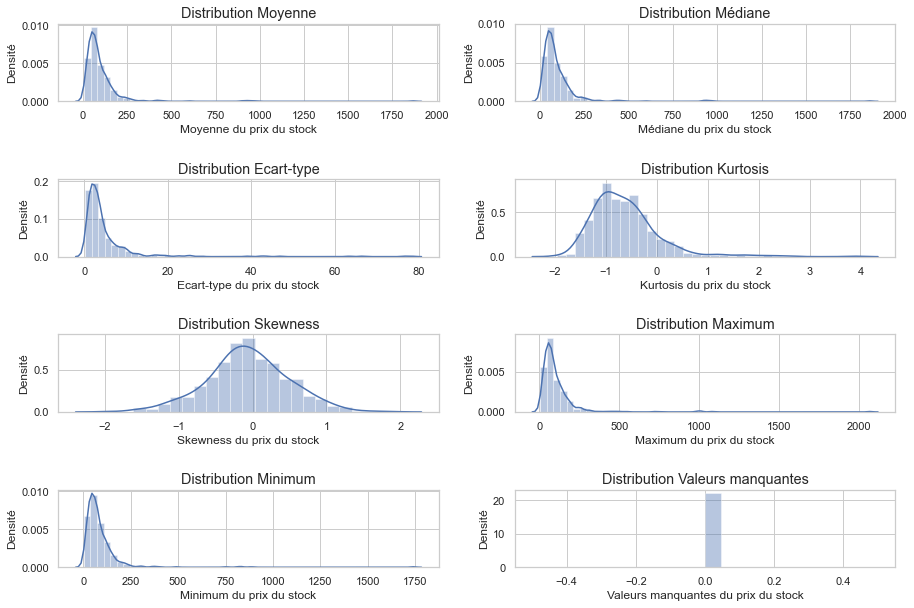

In [40]:
# Analyse descriptive

moy,med,ect,kut,skw,maxi,mini,val_manq={},{},{},{},{},{},{},{}

for i in stock_df.columns[2:]:
    moy[i]=np.mean(stock_df[i])
    med[i]=np.median(stock_df[i])
    ect[i]=stock_df[i].std()
    kut[i]=stats.kurtosis(stock_df[i])
    skw[i]=stats.skew(stock_df[i])
    maxi[i]=stock_df[i].max()
    mini[i]=stock_df[i].min()
    val_manq[i]=stock_df[i].isnull().sum()
    

liste=[moy,med,ect,kut,skw,maxi,mini,val_manq]
df_desc=pd.DataFrame(liste).transpose()
df_desc.columns=(['Moyenne','Médiane','Ecart-type','Kurtosis','Skewness','Maximum','Minimum','Valeurs manquantes'])

# plot
fig_1 = plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=1)
j=1
for i in df_desc.columns:
    ax_1 = fig_1.add_subplot(4,2,j)
    ax_1=sns.distplot(df_desc[i])
    plt.title("Distribution "+i,fontsize='large')
    ax_1.set(ylabel="Densité",xlabel=i+" du prix du stock")
    j+=1
plt.show()

In [66]:
df_desc.describe()

,Moyenne,Médiane,Ecart-type,Kurtosis,Skewness,Maximum,Minimum,Valeurs manquantes
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,97.778031,98.092433,5.011910,-0.628760,-0.062220,107.595430,87.675806,0.0
std,128.640700,129.333543,7.971931,0.676870,0.554514,142.527807,115.561199,0.0
min,4.990837,4.960000,0.262382,-1.956043,-1.942593,6.572500,3.550000,0.0
25%,44.632355,44.687500,1.725596,-1.070222,-0.396300,49.417500,39.427500,0.0
50%,70.695001,70.553125,3.073734,-0.736679,-0.072453,77.820000,63.922200,0.0
75%,113.925935,114.288750,5.166885,-0.350860,0.271745,123.872500,103.449375,0.0
max,1867.722306,1859.176650,78.341963,3.855879,1.832759,2067.500000,1738.462400,0.0


In [70]:
# Valeurs extrêmes de 'Ecart-type'
df_desc['Ecart-type'][df_desc['Ecart-type'].values >= 30]

NASDAQ.AMZN     38.966684
NASDAQ.GOOG     42.228052
NASDAQ.GOOGL    43.451194
NASDAQ.ISRG     66.399872
NASDAQ.PCLN     78.341963
NASDAQ.REGN     46.810038
NYSE.AZO        76.697768
NYSE.CMG        63.348471
Name: Ecart-type, dtype: float64

In [68]:
# Valeurs extrêmes de 'Ecart-type'
df_desc['Ecart-type'][df_desc['Ecart-type'].values <= 0.5]

NASDAQ.HBAN    0.358750
NASDAQ.PBCT    0.420250
NYSE.AES       0.281472
NYSE.F         0.262382
NYSE.HST       0.424612
NYSE.RF        0.378951
NYSE.WU        0.362162
Name: Ecart-type, dtype: float64

In [71]:
# Valeurs extrêmes de 'Moyenne'
df_desc['Moyenne'][df_desc['Moyenne'].values >= 450]

NASDAQ.AMZN      968.747188
NASDAQ.GOOG      922.131875
NASDAQ.GOOGL     941.369665
NASDAQ.ISRG      901.320301
NASDAQ.PCLN     1867.722306
NASDAQ.REGN      457.676948
NYSE.AZO         598.324633
Name: Moyenne, dtype: float64

In [65]:
# Valeurs extrêmes de 'Moyenne'
df_desc['Moyenne'][df_desc['Moyenne'].values <= 10]

NASDAQ.SPLS    9.666552
NYSE.CHK       4.990837
NYSE.RIG       9.564944
Name: Moyenne, dtype: float64

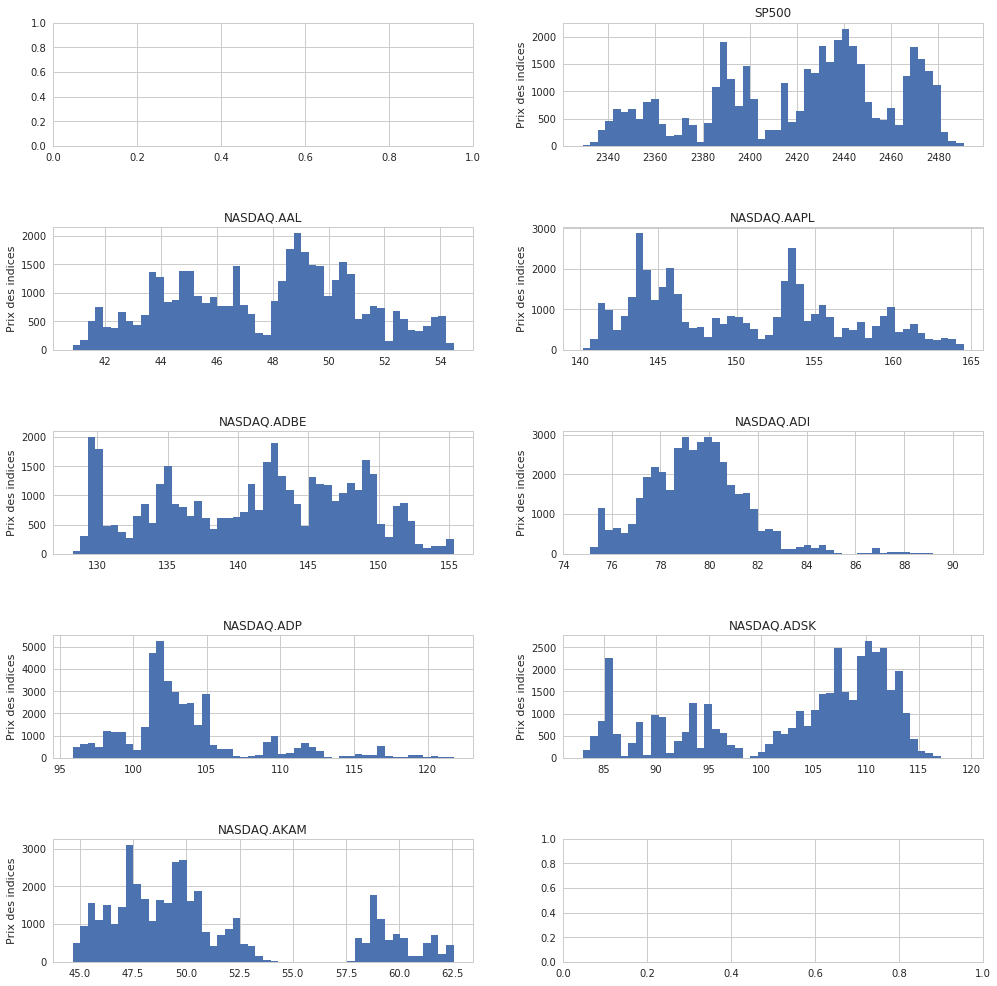

In [200]:
COLS       = [1,2,3,4,5,6,7,8]
fig, axs = plt.subplots(int(len(COLS)/2) + 1 , 2, figsize = (15,15))
fig.tight_layout(pad=5.0)



for idx in COLS:
    axs[idx // 2][idx % 2].hist(stock_df[stock_df.columns[idx]], bins=50)
    axs[idx // 2][idx % 2].set_ylabel("Prix des indices")
    axs[idx // 2][idx % 2].set_title(stock_df.columns[idx])
    
plt.show()



# Statistiques descriptives de la variable cible

In [81]:
df_plot = stock_df.copy()

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.]),
 <a list of 7 Text major ticklabel objects>)

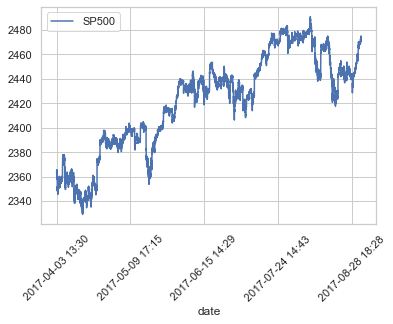

In [82]:
#Creation d'une colonne "date" avec le format normal
df_plot["date"]= [pd.to_datetime(day, unit='s').strftime('%Y-%m-%d %H:%M') for day in df_plot['DATE'].values]

#Plotting the data 
df_plot.iloc[0:41266].plot(x='date', y='SP500')
plt.xticks(rotation=45)

In [72]:
df_plot['SP500'].describe()

count    41266.000000
mean      2421.537882
std         39.557135
min       2329.139900
25%       2390.860100
50%       2430.149900
75%       2448.820100
max       2490.649900
Name: SP500, dtype: float64

# Préparation des données pour la modélisation

## Adaptation du dataset

In [4]:
df_copy = stock_df.copy()

In [5]:
pd.set_option('display.max_columns',None)
df_decale = df_copy.iloc[:,[0,1]].join(df_copy.iloc[:,2:].shift())
df_decale.drop(labels=0,axis=0,inplace=True)
df_decale

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,NASDAQ.AMGN,NASDAQ.AMZN,NASDAQ.ATVI,NASDAQ.AVGO,NASDAQ.BBBY,NASDAQ.BIIB,NASDAQ.CA,NASDAQ.CBOE,NASDAQ.CELG,NASDAQ.CERN,NASDAQ.CHRW,NASDAQ.CHTR,NASDAQ.CINF,NASDAQ.CMCSA,NASDAQ.CME,NASDAQ.COST,NASDAQ.CSCO,NASDAQ.CSX,NASDAQ.CTAS,NASDAQ.CTSH,NASDAQ.CTXS,NASDAQ.DISCA,NASDAQ.DISCK,NASDAQ.DISH,NASDAQ.DLTR,NASDAQ.EA,NASDAQ.EBAY,NASDAQ.EQIX,NASDAQ.ESRX,NASDAQ.ETFC,NASDAQ.EXPD,NASDAQ.EXPE,NASDAQ.FAST,NASDAQ.FB,NASDAQ.FFIV,NASDAQ.FISV,NASDAQ.FITB,NASDAQ.FLIR,NASDAQ.FOX,NASDAQ.FOXA,NASDAQ.GILD,NASDAQ.GOOG,NASDAQ.GOOGL,NASDAQ.GRMN,NASDAQ.GT,NASDAQ.HAS,NASDAQ.HBAN,NASDAQ.HOLX,NASDAQ.HSIC,NASDAQ.IDXX,NASDAQ.ILMN,NASDAQ.INCY,NASDAQ.INFO,NASDAQ.INTC,NASDAQ.INTU,NASDAQ.ISRG,NASDAQ.JBHT,NASDAQ.KHC,NASDAQ.KLAC,NASDAQ.LKQ,NASDAQ.LRCX,NASDAQ.MAR,NASDAQ.MAT,NASDAQ.MCHP,NASDAQ.MDLZ,NASDAQ.MNST,NASDAQ.MSFT,NASDAQ.MU,NASDAQ.MYL,NASDAQ.NAVI,NASDAQ.NDAQ,NASDAQ.NFLX,NASDAQ.NTAP,NASDAQ.NTRS,NASDAQ.NVDA,NASDAQ.NWS,NASDAQ.NWSA,NASDAQ.ORLY,NASDAQ.PAYX,NASDAQ.PBCT,NASDAQ.PCAR,NASDAQ.PCLN,NASDAQ.PDCO,NASDAQ.PYPL,NASDAQ.QCOM,NASDAQ.QRVO,NASDAQ.REGN,NASDAQ.ROST,NASDAQ.SBUX,NASDAQ.SNI,NASDAQ.SNPS,NASDAQ.SPLS,NASDAQ.SRCL,NASDAQ.STX,NASDAQ.SWKS,NASDAQ.SYMC,NASDAQ.TRIP,NASDAQ.TROW,NASDAQ.TSCO,NASDAQ.TXN,NASDAQ.ULTA,NASDAQ.VIAB,NASDAQ.VRSK,NASDAQ.VRSN,NASDAQ.VRTX,NASDAQ.WBA,NASDAQ.WDC,NASDAQ.WFM,NASDAQ.WLTW,NASDAQ.WYNN,NASDAQ.XLNX,NASDAQ.XRAY,NASDAQ.ZION,NYSE.A,NYSE.AAP,NYSE.ABBV,NYSE.ABC,NYSE.ABT,NYSE.ACN,NYSE.ADM,NYSE.ADS,NYSE.AEE,NYSE.AEP,NYSE.AES,NYSE.AET,NYSE.AFL,NYSE.AGN,NYSE.AIG,NYSE.AIV,NYSE.AIZ,NYSE.AJG,NYSE.ALB,NYSE.ALK,NYSE.ALL,NYSE.ALLE,NYSE.AME,NYSE.AMG,NYSE.AMP,NYSE.AMT,NYSE.AN,NYSE.ANTM,NYSE.AON,NYSE.APA,NYSE.APC,NYSE.APD,NYSE.APH,NYSE.ARE,NYSE.ARNC,NYSE.AVB,NYSE.AVY,NYSE.AWK,NYSE.AXP,NYSE.AYI,NYSE.AZO,NYSE.BA,NYSE.BAC,NYSE.BAX,NYSE.BBT,NYSE.BBY,NYSE.BCR,NYSE.BDX,NYSE.BEN,NYSE.BF.B,NYSE.BHI,NYSE.BK,NYSE.BLK,NYSE.BLL,NYSE.BMY,NYSE.BRK.B,NYSE.BSX,NYSE.BWA,NYSE.BXP,NYSE.C,NYSE.CAG,NYSE.CAH,NYSE.CAT,NYSE.CB,NYSE.CBG,NYSE.CBS,NYSE.CCI,NYSE.CCL,NYSE.CF,NYSE.CFG,NYSE.CHD,NYSE.CHK,NYSE.CI,NYSE.CL,NYSE.CLX,NYSE.CMA,NYSE.CMG,NYSE.CMI,NYSE.CMS,NYSE.CNC,NYSE.CNP,NYSE.COF,NYSE.COG,NYSE.COH,NYSE.COL,NYSE.COO,NYSE.COP,NYSE.COTY,NYSE.CPB,NYSE.CRM,NYSE.CSRA,NYSE.CTL,NYSE.CVS,NYSE.CVX,NYSE.CXO,NYSE.D,NYSE.DAL,NYSE.DD,NYSE.DE,NYSE.DFS,NYSE.DG,NYSE.DGX,NYSE.DHI,NYSE.DHR,NYSE.DIS,NYSE.DLPH,NYSE.DLR,NYSE.DOV,NYSE.DOW,NYSE.DPS,NYSE.DRI,NYSE.DTE,NYSE.DUK,NYSE.DVA,NYSE.DVN,NYSE.DXC,NYSE.ECL,NYSE.ED,NYSE.EFX,NYSE.EIX,NYSE.EL,NYSE.EMN,NYSE.EMR,NYSE.EOG,NYSE.EQR,NYSE.EQT,NYSE.ES,NYSE.ESS,NYSE.ETN,NYSE.ETR,NYSE.EVHC,NYSE.EW,NYSE.EXC,NYSE.EXR,NYSE.F,NYSE.FBHS,NYSE.FCX,NYSE.FDX,NYSE.FE,NYSE.FIS,NYSE.FL,NYSE.FLR,NYSE.FLS,NYSE.FMC,NYSE.FRT,NYSE.FTI,NYSE.FTV,NYSE.GD,NYSE.GE,NYSE.GGP,NYSE.GIS,NYSE.GLW,NYSE.GM,NYSE.GPC,NYSE.GPN,NYSE.GPS,NYSE.GS,NYSE.GWW,NYSE.HAL,NYSE.HBI,NYSE.HCA,NYSE.HCN,NYSE.HCP,NYSE.HD,NYSE.HES,NYSE.HIG,NYSE.HOG,NYSE.HON,NYSE.HP,NYSE.HPE,NYSE.HPQ,NYSE.HRB,NYSE.HRL,NYSE.HRS,NYSE.HST,NYSE.HSY,NYSE.HUM,NYSE.IBM,NYSE.ICE,NYSE.IFF,NYSE.IP,NYSE.IPG,NYSE.IR,NYSE.IRM,NYSE.IT,NYSE.ITW,NYSE.IVZ,NYSE.JCI,NYSE.JEC,NYSE.JNJ,NYSE.JNPR,NYSE.JPM,NYSE.JWN,NYSE.K,NYSE.KEY,NYSE.KIM,NYSE.KMB,NYSE.KMI,NYSE.KMX,NYSE.KO,NYSE.KORS,NYSE.KR,NYSE.KSS,NYSE.KSU,NYSE.L,NYSE.LB,NYSE.LEG,NYSE.LEN,NYSE.LH,NYSE.LLL,NYSE.LLY,NYSE.LMT,NYSE.LNC,NYSE.LNT,NYSE.LOW,NYSE.LUK,NYSE.LUV,NYSE.LVLT,NYSE.LYB,NYSE.M,NYSE.MA,NYSE.MAA,NYSE.MAC,NYSE.MAS,NYSE.MCD,NYSE.MCK,NYSE.MCO,NYSE.MDT,NYSE.MET,NYSE.MHK,NYSE.MKC,NYSE.MLM,NYSE.MMC,NYSE.MMM,NYSE.MNK,NYSE.MO,NYSE.MON,NYSE.MOS,NYSE.MPC,NYSE.MRK,NYSE.MRO,NYSE.MS,NYSE.MSI,NYSE.MTB,NYSE.MUR,NYSE.NBL,NYSE.NEE,NYSE.NEM,NYSE.NFX,NYSE.NI,NYSE.NKE,NYSE.NLSN,NYSE.NOC,NYSE.NOV,NYSE.NRG,NYSE.NSC,NYSE.NUE,NYSE.NWL,NYSE.O,NYSE.OKE,NYSE.OMC,NYSE.ORCL,NYSE.OXY,NYSE.PCG,NYSE.PEG,NYSE.PEP,NYSE.PFE,NYSE.PFG,NYSE.PG,NYSE.PGR,NYSE.PH,NYSE.PHM,NYSE.PKI,NYSE.PLD,NYSE.PM,NYSE.PNC,NYSE.PNR,NYSE.PNW,NYSE.PPG,NYSE.PPL,NYSE.PRGO,NYSE.PRU,NYSE.PSA,NYSE.PSX,NYSE.PVH,NYSE.PW

# Modèle de réseau de neurones avec tensorflow

## Découpage du jeu de données en train et test

Découpage du jeu de données de façon séquentielle et non aléatoire, pour conserver l'effet de la temporalité. Jeu d'entrainement = 80% des données initiales Jeu de test = 20% des données initiales

In [6]:
df_split = df_decale.copy()

In [7]:
# Dimensions of dataset
size = df_split.shape[0]

# Transformation en array
df_array = df_split.values

In [8]:
# Training and test data
begin_train = 0
end_train = int(np.floor(0.8*size))
begin_test = end_train
end_test = size

df_train = pd.DataFrame(df_array[np.arange(begin_train, end_train), :])
df_test = pd.DataFrame(df_array[np.arange(begin_test, end_test), :])
#y_train = Y_[np.arange(begin_train, end_train), :]
#y_test = Y_[np.arange(begin_test, end_test), :]

## Normalisation

La méthode de standardisation que nous allons appliquer est le minmax scaler qui est défini comme suit.<br/>

Soit la colonne $X_i$<br/>

$X_i = \frac{X_i - moyenne(X_i)}{max(X_i) - min(X_i)}$

In [9]:
"""
SS = MinMaxScaler()
df_train_norm = pd.DataFrame(SS.fit_transform(df_train))
df_test_norm = pd.DataFrame(SS.fit_transform(df_test))

print(df_train_norm[:10])
print(df_test_norm[:10])
"""

'\nSS = MinMaxScaler()\ndf_train_norm = pd.DataFrame(SS.fit_transform(df_train))\ndf_test_norm = pd.DataFrame(SS.fit_transform(df_test))\n\nprint(df_train_norm[:10])\nprint(df_test_norm[:10])\n'

On obtient finallement des vecteurs avec des valeurs toutes comprises entre -1 et 1

## Séparation Inputs et outputs

Selon les derniers graphes, les indices n'ont pas une distribution particulière (ne se fient pas à une loi de probabilité connue).

Il est aussi à remarquer que chaque indice a ses propres plages de variations. Nous avons donc intêret d'abord à séparer les inputs des outputs, et de rendre les données à la même échelle avant implémentation de tout modèle d'apprentissage.

In [10]:
"""
# Split train / test normalisé    
X_train = df_train_norm.iloc[:,2:].values
X_test = df_test_norm.iloc[:,2:].values
y_train = df_train_norm.iloc[:,1:2].values
y_test = df_test_norm.iloc[:,1:2].values
"""

'\n# Split train / test normalisé    \nX_train = df_train_norm.iloc[:,2:].values\nX_test = df_test_norm.iloc[:,2:].values\ny_train = df_train_norm.iloc[:,1:2].values\ny_test = df_test_norm.iloc[:,1:2].values\n'

In [11]:
# Split train / test non normalisé       
X_train = df_train.iloc[:,2:].values
X_test = df_test.iloc[:,2:].values
y_train = df_train.iloc[:,1:2].values
y_test = df_test.iloc[:,1:2].values

In [12]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

33012 33012
8253 8253


In [13]:
print("La taille du dataset utilisé pour l'entrainement : {}".format(len(y_train)))
print("La taille du dataset utilisé pour le test : {}".format(len(y_test)))
y_train = y_train.flatten()
y_test  = y_test.flatten()


La taille du dataset utilisé pour l'entrainement : 33012
La taille du dataset utilisé pour le test : 8253


## Adaboost 

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

ada_reg = AdaBoostRegressor(n_estimators=100, learning_rate=1.0, loss='linear',)
print(ada_reg)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)


In [19]:
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=100, random_state=None)

In [ ]:
""""""""""""""""""""""""""""""from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[100,200],'learning_rate':[0.01,.1]}

clf = GridSearchCV(ada_reg, parameters)
clf.fit(X_train, y_train)
""""""""""""""""""""""""""""""""""""""""""""

In [20]:
y_pred = ada_reg.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 122.19
RMSE: 11.05


Feature ranking:
1. feature 473 (0.124155)
2. feature 436 (0.099304)
3. feature 64 (0.094591)
4. feature 392 (0.092246)
5. feature 151 (0.080841)
6. feature 490 (0.038644)
7. feature 118 (0.036455)
8. feature 164 (0.029631)
9. feature 465 (0.027060)
10. feature 343 (0.025294)


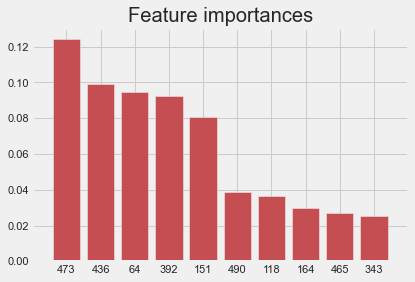

In [34]:
importances = ada_reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in ada_reg.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
top_k = 10
new_indices = indices[:top_k]

# Print the feature ranking
print("Feature ranking:")

for f in range(top_k):
    print("%d. feature %d (%f)" % (f + 1, new_indices[f], importances[new_indices[f]]))

#Plot the feature importances of the tree
plt.figure()
plt.title("Feature importances")
plt.bar(range(top_k), importances[new_indices],
       color="r", align="center")

#Edited here (put top_k in range)
plt.xticks(range(top_k), new_indices)
#Edited here (put top_k)
plt.xlim([-1, top_k])
plt.show()

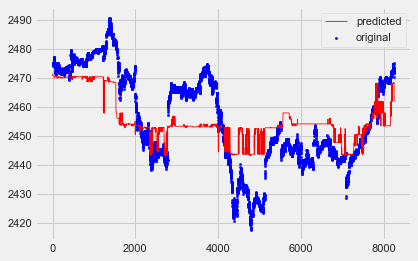

In [35]:
#visualizing the original and predicted test data in a plot
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

## Modélisation

Selon les figures précedentes, nous remarquons qu'il n'ya pas une tendance déterministe sur nos série, ou des formes peudo-périodique. Ainsi en absence d'hypothèses concernant le lien entre nos données, nous estimons que S&P500 est fun fonction complexe des 500 indices. Le meilleur modèle permettant d'avoir une approximation de cette fonction, en présence de telles ambiguités sont les réseaux de neurons. <br/>

Comme la taille de l'entrée pour notre modèle restera toujours fixe, nous allons choisir d'utiliser un réseau de neurones fully connected ( chaque neurons d'une couche est connecté à tous les neurons de la couche d'avant ).<br/>

Selon des recommendations de l'état de l'art, nous utiliserons un modèle avec l'architecture suivante.<br/>


Concernant la taille du batch, le nombre de couches cachées, le nombre de neurone par couche cachée, ce sont des hyperparamètres qu'on fixe au début.
pour plus de réglage on peut utiliser la fonction (GridSearch).

La fonction de loss que nous avons utilisé est la MSE loss qui s'exprime de la façon suivante :

$MSE = \frac{1}{N}\sum{n \in [1,N]}(y_i - pred_i)^2$

In [541]:
# Déclaration des constantes importantes
batch_size    = 128
number_stocks = 500

X = tf.placeholder(dtype=tf.float32, shape=[None, number_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])

In [542]:
# Déclaration de la taille des neurones
neuron_1 = 256
neuron_2 = 128
target = 1

In [543]:
# Initialisation des poids et des erreurs
scaler = 1
init_weight = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=scaler)
init_bias = tf.zeros_initializer()

In [544]:
# Fonction qui renvoie les poids et les erreurs
def get_neuron (dim1, dim2) :
    weight_variable =  tf.Variable(init_weight([dim1, dim2]))
    bias_variable = tf.Variable(init_bias([dim2]))
    return weight_variable, bias_variable 

In [545]:
# 1ère couche : 256 neurones
weight_1, bias_1 = get_neuron (number_stocks, neuron_1)

# 2ème couche : 128 neurones
weight_2, bias_2 = get_neuron (neuron_1, neuron_2)

# Couche output : 1 neurone
weight_output, bias_output = get_neuron (neuron_2, target)

In [546]:
# Implémentation des relations entre couches
layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weight_1), bias_1))
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weight_2), bias_2))

# Couche de sortie
layer_out = tf.transpose(tf.add(tf.matmul(layer_2, weight_output), bias_output))

# La loss function
loss = tf.reduce_mean(tf.squared_difference(layer_out, Y))

# Optimiseur
optimizer = tf.train.AdamOptimizer().minimize(loss)

In [547]:
# Début de session d'apprentissage
sess = tf.Session()

# Initialisation des poids
sess.run(tf.global_variables_initializer())

# Nombre d'epochs 
epochs = 20

for e in range(epochs):

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        x_minibatch = X_train[start:start + batch_size]
        y_minibatch = y_train[start:start + batch_size]
        # Execution de l'optimiseur sur un batch
        sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
        # Affichage de la progression
        if np.mod(i,5) == 0:
            print('Epoch ' + str(e) + ', Batch ' + str(i))


Epoch 0, Batch 0
Epoch 0, Batch 5
Epoch 0, Batch 10
Epoch 0, Batch 15
Epoch 0, Batch 20
Epoch 0, Batch 25
Epoch 0, Batch 30
Epoch 0, Batch 35
Epoch 0, Batch 40
Epoch 0, Batch 45
Epoch 0, Batch 50
Epoch 0, Batch 55
Epoch 0, Batch 60
Epoch 0, Batch 65
Epoch 0, Batch 70
Epoch 0, Batch 75
Epoch 0, Batch 80
Epoch 0, Batch 85
Epoch 0, Batch 90
Epoch 0, Batch 95
Epoch 0, Batch 100
Epoch 0, Batch 105
Epoch 0, Batch 110
Epoch 0, Batch 115
Epoch 0, Batch 120
Epoch 0, Batch 125
Epoch 0, Batch 130
Epoch 0, Batch 135
Epoch 0, Batch 140
Epoch 0, Batch 145
Epoch 0, Batch 150
Epoch 0, Batch 155
Epoch 0, Batch 160
Epoch 0, Batch 165
Epoch 0, Batch 170
Epoch 0, Batch 175
Epoch 0, Batch 180
Epoch 0, Batch 185
Epoch 0, Batch 190
Epoch 0, Batch 195
Epoch 0, Batch 200
Epoch 0, Batch 205
Epoch 0, Batch 210
Epoch 0, Batch 215
Epoch 0, Batch 220
Epoch 0, Batch 225
Epoch 0, Batch 230
Epoch 0, Batch 235
Epoch 0, Batch 240
Epoch 0, Batch 245
Epoch 0, Batch 250
Epoch 0, Batch 255
Epoch 1, Batch 0
Epoch 1, Batch 5


Epoch 8, Batch 185
Epoch 8, Batch 190
Epoch 8, Batch 195
Epoch 8, Batch 200
Epoch 8, Batch 205
Epoch 8, Batch 210
Epoch 8, Batch 215
Epoch 8, Batch 220
Epoch 8, Batch 225
Epoch 8, Batch 230
Epoch 8, Batch 235
Epoch 8, Batch 240
Epoch 8, Batch 245
Epoch 8, Batch 250
Epoch 8, Batch 255
Epoch 9, Batch 0
Epoch 9, Batch 5
Epoch 9, Batch 10
Epoch 9, Batch 15
Epoch 9, Batch 20
Epoch 9, Batch 25
Epoch 9, Batch 30
Epoch 9, Batch 35
Epoch 9, Batch 40
Epoch 9, Batch 45
Epoch 9, Batch 50
Epoch 9, Batch 55
Epoch 9, Batch 60
Epoch 9, Batch 65
Epoch 9, Batch 70
Epoch 9, Batch 75
Epoch 9, Batch 80
Epoch 9, Batch 85
Epoch 9, Batch 90
Epoch 9, Batch 95
Epoch 9, Batch 100
Epoch 9, Batch 105
Epoch 9, Batch 110
Epoch 9, Batch 115
Epoch 9, Batch 120
Epoch 9, Batch 125
Epoch 9, Batch 130
Epoch 9, Batch 135
Epoch 9, Batch 140
Epoch 9, Batch 145
Epoch 9, Batch 150
Epoch 9, Batch 155
Epoch 9, Batch 160
Epoch 9, Batch 165
Epoch 9, Batch 170
Epoch 9, Batch 175
Epoch 9, Batch 180
Epoch 9, Batch 185
Epoch 9, Batch 

Epoch 16, Batch 230
Epoch 16, Batch 235
Epoch 16, Batch 240
Epoch 16, Batch 245
Epoch 16, Batch 250
Epoch 16, Batch 255
Epoch 17, Batch 0
Epoch 17, Batch 5
Epoch 17, Batch 10
Epoch 17, Batch 15
Epoch 17, Batch 20
Epoch 17, Batch 25
Epoch 17, Batch 30
Epoch 17, Batch 35
Epoch 17, Batch 40
Epoch 17, Batch 45
Epoch 17, Batch 50
Epoch 17, Batch 55
Epoch 17, Batch 60
Epoch 17, Batch 65
Epoch 17, Batch 70
Epoch 17, Batch 75
Epoch 17, Batch 80
Epoch 17, Batch 85
Epoch 17, Batch 90
Epoch 17, Batch 95
Epoch 17, Batch 100
Epoch 17, Batch 105
Epoch 17, Batch 110
Epoch 17, Batch 115
Epoch 17, Batch 120
Epoch 17, Batch 125
Epoch 17, Batch 130
Epoch 17, Batch 135
Epoch 17, Batch 140
Epoch 17, Batch 145
Epoch 17, Batch 150
Epoch 17, Batch 155
Epoch 17, Batch 160
Epoch 17, Batch 165
Epoch 17, Batch 170
Epoch 17, Batch 175
Epoch 17, Batch 180
Epoch 17, Batch 185
Epoch 17, Batch 190
Epoch 17, Batch 195
Epoch 17, Batch 200
Epoch 17, Batch 205
Epoch 17, Batch 210
Epoch 17, Batch 215
Epoch 17, Batch 220
Ep

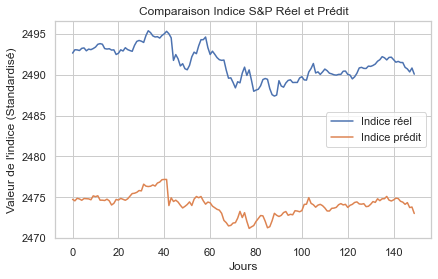

L'erreur MSE est égale à : 87.39397430419922
L'erreur RMSE est égale à : 9.348474502563477


In [555]:
prediction = sess.run(layer_out, feed_dict={X: X_test})

#Plot des performances 
plt.clf()
plt.plot(range(150), prediction[0][:150])
plt.plot(range(150), y_test[:150])
#plt.axis([0, 150, 2450, 2500])
plt.title('Comparaison Indice S&P Réel et Prédit')
plt.xlabel('Jours')
plt.ylabel("Valeur de l'indice (Standardisé)")
plt.legend(["Indice réel","Indice prédit"])
plt.show()

# L'erreur finale
final_mse = sess.run(loss, feed_dict={X: X_test, Y: y_test})
print("L'erreur MSE est égale à : {}".format(final_mse))

final_rmse = np.sqrt(final_mse)
print("L'erreur RMSE est égale à : {}".format(final_rmse))


# Modèle de réseau de neurones avec sklearn

In [561]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [562]:
df_rnn = df_decale.copy()

In [563]:
X=df_rnn.iloc[:,2:]
Y=df_rnn["SP500"]

[    0     1     2 ... 10314 10315 10316] [10317 10318 10319 ... 20630 20631 20632]
Iteration 1, loss = 89379.59788050
Iteration 2, loss = 71.21260065
Iteration 3, loss = 55.41715719
Iteration 4, loss = 56.70053774
Iteration 5, loss = 53.62310661
Iteration 6, loss = 52.44892281
Iteration 7, loss = 40.80222517
Iteration 8, loss = 94.93841975
Iteration 9, loss = 48.28595300
Iteration 10, loss = 61.32199804
Iteration 11, loss = 418.03165866
Iteration 12, loss = 106.95512111
Iteration 13, loss = 10.16845223
Iteration 14, loss = 9.28093028
Iteration 15, loss = 10.46795012
Iteration 16, loss = 10.18324924
Iteration 17, loss = 172.14484464
Iteration 18, loss = 16.45304981
Iteration 19, loss = 213.95837117
Iteration 20, loss = 50.09323027
Iteration 21, loss = 12.96393354
Iteration 22, loss = 88.55375017
Iteration 23, loss = 531.77347460
Iteration 24, loss = 58.05182979
Iteration 25, loss = 7.89177302
Iteration 26, loss = 6.21057693
Iteration 27, loss = 9.21483051
Iteration 28, loss = 12.876695

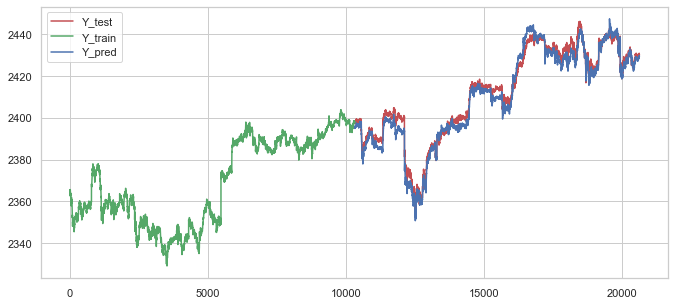

[    0     1     2 ... 20630 20631 20632] [20633 20634 20635 ... 30946 30947 30948]
Iteration 1, loss = 45379.24725016
Iteration 2, loss = 52.52745430
Iteration 3, loss = 99.95904691
Iteration 4, loss = 157.26044321
Iteration 5, loss = 18.88869322
Iteration 6, loss = 16.85609826
Iteration 7, loss = 68.26399630
Iteration 8, loss = 143.62201776
Iteration 9, loss = 28.26375912
Iteration 10, loss = 212.57261121
Iteration 11, loss = 65.87058504
Iteration 12, loss = 14.43822702
Iteration 13, loss = 58.64069394
Iteration 14, loss = 80.26842867
Iteration 15, loss = 59.89072396
Iteration 16, loss = 85.41190479
Iteration 17, loss = 156.96303104
Iteration 18, loss = 15.38006973
Iteration 19, loss = 113.34891326
Iteration 20, loss = 33.36699597
Iteration 21, loss = 103.61780576
Iteration 22, loss = 151.60595374
Iteration 23, loss = 163.20972731
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
L'erreur RMSE est égale à : 13.736052144650907


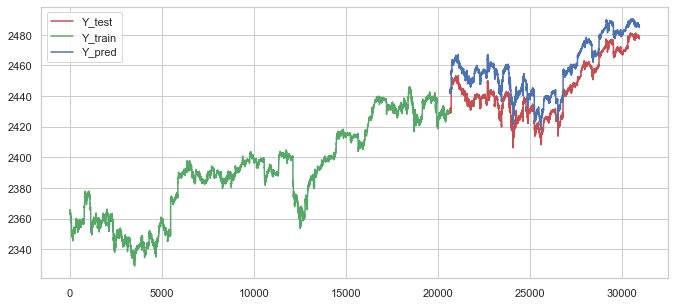

[    0     1     2 ... 30946 30947 30948] [30949 30950 30951 ... 41262 41263 41264]
Iteration 1, loss = 30812.01473748
Iteration 2, loss = 22.94984892
Iteration 3, loss = 15.52589804
Iteration 4, loss = 22.58641522
Iteration 5, loss = 96.38595323
Iteration 6, loss = 83.74664468
Iteration 7, loss = 70.06829621
Iteration 8, loss = 75.76283018
Iteration 9, loss = 92.83495741
Iteration 10, loss = 36.91691964
Iteration 11, loss = 70.10083918
Iteration 12, loss = 62.94857589
Iteration 13, loss = 124.91276305
Iteration 14, loss = 258.50252756
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
L'erreur RMSE est égale à : 7.18985678844792


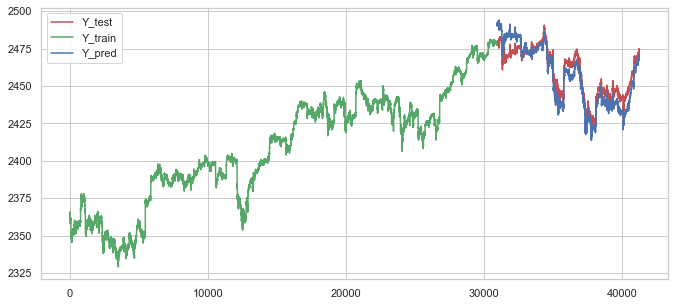

In [564]:
tss = TimeSeriesSplit(n_splits = 3)
estimator = MLPRegressor(hidden_layer_sizes=(16,6,4),
                          activation='relu', 
                          solver='adam', batch_size=200,verbose=True,
                          learning_rate='adaptive' , learning_rate_init=0.03,max_iter=200,random_state=1)

for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    print(train_index, test_index)
    
    
    estimator.fit(X_train, Y_train)
    Y_pred=estimator.predict(X_test)

    RMSE=np.sqrt(mean_squared_error(Y_test,Y_pred))
    print("L'erreur RMSE est égale à : {}".format(RMSE))
    
    plt.figure(figsize=(10,5))
    plt.plot(test_index,Y_test,color='r',label='Y_test')
    plt.plot(train_index,Y_train,color='g',label='Y_train')
    plt.plot(test_index,Y_pred,color='b',label='Y_pred')
    plt.legend(loc='best')
    plt.show()

# TEST Gradient Boosting

In [556]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [557]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 100.2877


AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

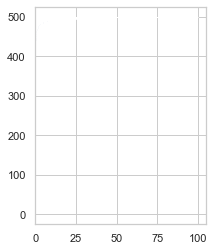

In [560]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df_decale.iloc[:,1:].values.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# TEST eXtreme Gradient Boosting 

In [513]:
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

xgbr = XGBRegressor() 
print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [514]:
xgbr.fit(X_train, y_train)

[12:00:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [515]:
y_preds = xgbr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % np.sqrt(mse))

MSE: 112.45
RMSE: 10.60


In [ ]:
# Feature importance
#_ = plot_importance(xgbr, height=0.2, max_num_features = 10)
xgb.plot_importance(xgbr, max_num_features = 10)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [ ]:
#visualizing the original and predicted test data in a plot
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_preds, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

# STILL TO CHECK

## Prévision avec régression linéaire 

Dans cette partie nous supposerons l'existence d'une relation linéaire entre nos données ( Hypothèse que l'on cherchera à valider par la suite ) et nous essayerons de mettre en place un modèle de régression linéaire.

Ainsi dans un premier temps nous essayerons de faire une regression en fonction de tout les 500 features, en utilisant les données standardisés et la même subdivision pour le set, entrainement - test

La MSE pour le modèle est : 0.0003086998683112385
Le coefficient R2 est égale à : 0.9690024727137819


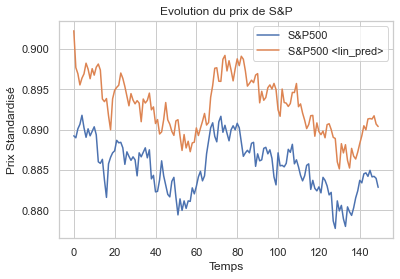

In [117]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Le modèle de regression linéaire 
reg             = LinearRegression().fit(X_train, y_train)
pred            = reg.predict(X_test)

mse_regression  = 0 

for i in range(len(y_test)):
    mse_regression += ((y_test[i] - pred[i])**2)

mse_regression = mse_regression/len(y_test)
r2             = reg.score(X_test, y_test)

print("La MSE pour le modèle est : {}".format(mse_regression))
print("Le coefficient R2 est égale à : {}".format(r2))

# Plot comparatif entre modèle réel et estimé
plt.clf()
plt.plot(range(150), y_test[150:300])
plt.plot(range(150), pred[150:300]  )
plt.title("Evolution du prix de S&P")
plt.xlabel("Temps")
plt.ylabel("Prix Standardisé")
plt.legend(["S&P500", "S&P500 <lin_pred>"])
plt.show()


Ce modèle est très performant, et donne une erreur de 6.91329941919845e-06, Ce qui nous pousse à considérer l'existence d'une relation linéaire entre toutes ces variables. Le coefficient R2 ici est proche de 1, ce qui signifie que le modèle explique bien la variance des données.

Nous regardons les coefficients de regression qui ont été utilisé : 

In [204]:
print("L'intercept est : {}".format(reg.intercept_))
print("Les poids associées aux variables (Dans l'ordre) sont : {}".format(reg.coef_))

L'intercept est : -0.7088340455673819
Les poids associées aux variables (Dans l'ordre) sont : [ 4.55637718e-03  8.92175523e-02  8.00567064e-03  3.86160715e-03
  1.20571799e-02  7.77841306e-03  5.14699114e-03  3.84916785e-03
  7.04566042e-03  1.52087021e-03  1.23316348e-02  5.85904392e-02
  6.63866444e-03  1.62429750e-02  1.48616195e-03  7.99658116e-03
 -8.55133254e-04  7.33966070e-03  1.40809976e-02  3.72268281e-03
  4.48612738e-03  7.88168504e-03 -8.27518709e-04  1.81037647e-02
 -5.41679488e-04  6.17610006e-03  1.46723798e-02  5.39248843e-03
 -4.69875460e-04  9.81259744e-03  3.77920077e-04  3.23244844e-03
  1.60188372e-03  2.76876620e-03  2.33853938e-03  7.11756678e-03
  4.51868175e-03  7.40562343e-04  6.96496761e-03  5.96695485e-04
  2.29852235e-03  2.45123558e-03  6.78127538e-03  6.63614375e-02
  2.99307483e-04  2.77686815e-03  5.26585663e-03  5.21693652e-04
 -6.22340516e-03  1.49455157e-02  1.66376905e-02  3.21630552e-02
  3.49414578e-02 -9.80822156e-04 -7.23945560e-04  4.53500716e

## Validation hypothèse linéarité (Normalité des résidus)

Nous nous intéressons cette fois-ci au plot des résidus, si notre hypothèse est valable
les résidus doivent avoit une allure gaussienne

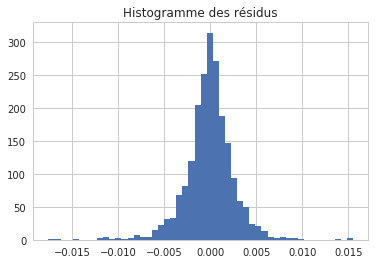

La skewness de la série est : -0.4215548463365436
Le curtosis de la série est : 5.120043768341926


In [205]:
from scipy.stats import kurtosis
from scipy.stats import skew


res = [(y_test[i] - pred[i]) for i in range(len(y_test))]

# Plot de l'histogramme des résidus
plt.clf()
plt.hist(res, bins=50)
plt.title("Histogramme des résidus")
plt.show()


print("La skewness de la série est : {}".format(skew(res)))
print("Le curtosis de la série est : {}".format(kurtosis(res)))



Ainsi comme nous nous attendions, les résidus suivent un profil gaussien , confirmé aussi par
les valeurs des skewness et curtosis. qui s'interprètent comme suit : 

<img src = "img/skw.gif" />

## Prévision avec arbre de regression

Nous implémentons pour ce dernier cas un arbre de regression. Dans ces structures d'arbre, les feuilles représentent les valeurs de la variable-cible et les embranchements correspondent à des combinaisons de variables d'entrée qui mènent à ces valeurs.
En analyse de décision, un arbre de décision peut être utilisé pour représenter de manière explicite les décisions réalisées et les processus qui les amènent.<br/><br/>
Dans notre cas nous ne pouvons pas visualiser cela puisque la taille de l'arbre sera assez grande. Nous nous contentons que de la mesure de performance finale <br/>



La MSE pour le modèle est : 3.3494667728674657e-09


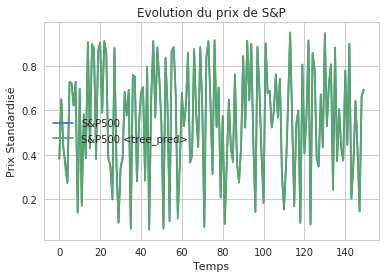

In [154]:
from sklearn.tree import DecisionTreeRegressor

reg_tree        = DecisionTreeRegressor()
reg_tree.fit(X_train, y_train)

pred_tree       = reg_tree.predict(X_test)

mse_tree        = 0 

for i in range(len(y_test)):
    mse_tree   += ((y_test[i] - pred[i])**2)

mse_regression  = mse_regression/len(y_test)

print("La MSE pour le modèle est : {}".format(mse_regression))

# Plot comparatif entre modèle réel et estimé
plt.clf()
plt.plot(range(150), y_test[150:300])
plt.plot(range(150), pred_tree[150:300]  )
plt.title("Evolution du prix de S&P")
plt.xlabel("Temps")
plt.ylabel("Prix Standardisé")
plt.legend(["S&P500", "S&P500 <tree_pred>"])
plt.show()

Comme nous voyons, le modèle "Regression tree" est le plus performant parmis tous les autres.